# Task 1 - Bike Journey Data

In [1]:
#Important libraries for working with data
#Pandas for data framework, matplotlib and seaborn for plotting/manipulating data
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy


## 1.1 Loading Data and Pre-processing
The first step is loading the data file, namely metro.csv, into a panda dataframe. This will enable us to use and manipulate the data for the sake of statistical analysis.

Analysis of the data reveals that there are null entries within the data set, namely within 2084 of the 95283 records. As null data is essentially useless, there is a choice of either replacing the missing values with a random value, such as 0, or removing the record entirely. 

The null data is to only be missing within the latitude columns, meaning replacing the data with a random value is a viable option. Despite this, this problems only affects roughly 2% of our data. For this reason, it can be argued that removing the rows as opposed to filling them makes more sense, since filling the results would simply skew the result given by the majority of the sample whilst removing them still leaves more than enough data for analysis. 

In [2]:
#Import the metro.csv file into a panda dataframe
metro = pd.read_csv("metro.csv")

#Import the null data into another dataframe
null_data = metro[metro.isnull().any(axis=1)]
print("No. of null records: ", len(null_data.index))
print("No. of records: ", len(metro.index))

#Remove any of the null data, print sample dataframe
metro.dropna()
metro.head()


No. of null records:  2084
No. of records:  95283


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up


## 1.2 Distribution of Duration

C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


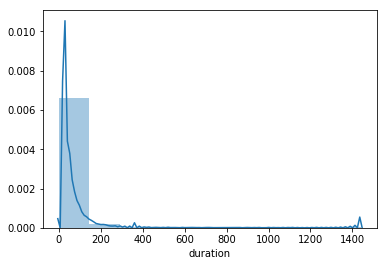

In [62]:
sns.distplot(metro['duration'], bins=10)

The histogram shows that the majority of journeys last between 0-200 minutes, with the mean average journey lasting 48.32 (to 2dp) minutes. 

The distribution of this variable displays that there are outliers, as shown by the peaks in the line, but most of the journeys are of a shorter duration as previously mentioned. This can be further explored and visualised with a boxplot. 

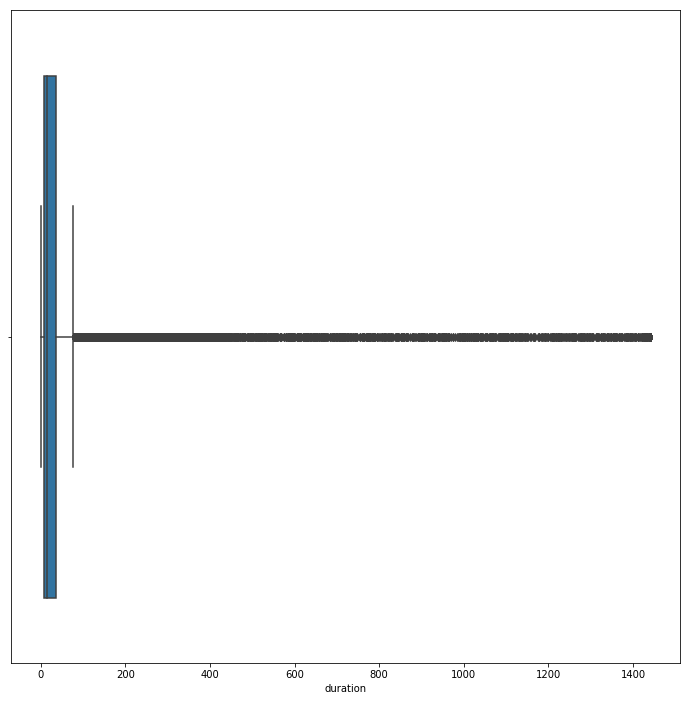

In [68]:
fig, (ax1) = plt.subplots(1,figsize=(12,12))
sns.boxplot(metro['duration'], ax=ax1)
plt.show()

As depicted by the grey bar, there are cleary a high degree of outliers past the upper quartile, namely past the upper quartile (35 mins). 

## 1.3 Duration in Relation to Passholder Type
Looking at the distribution of the duration in relation to passholder type will reveal the different trends in terms of the length of the journey dependent on the type of pass the person is using. To examine this, a bar graph can be plotted using the average duration time per passholder type. 

C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


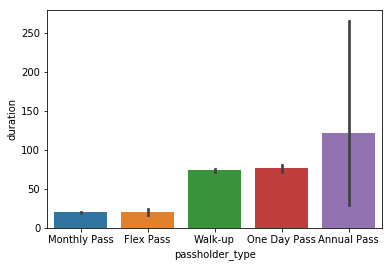

In [5]:
sns.barplot(data=metro, x="passholder_type", y="duration")

## 1.4 One Day/Flex Pass Mean Duration
A t-test can be used to determine if the mean duration of the one day and flex pass is different. For this test, it is assumed that both the variables follow a normal distribution and have the same variance. 

4737 1577
Ttest_indResult(statistic=13.897993285036403, pvalue=2.8141174842219548e-43)


C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


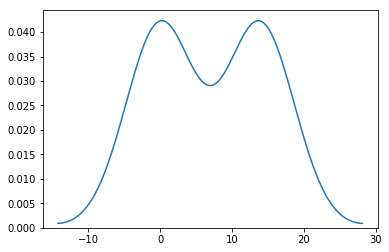

In [6]:
#Store only the instances of One Day Pass and Flex Pass
odp = metro[metro['passholder_type'] == 'One Day Pass']
fp = metro[metro['passholder_type'] == 'Flex Pass']

print(len(odp.index), len(fp.index))

#Perform indepedent t-test to compare means
t = scipy.stats.ttest_ind(odp['duration'], fp['duration'])
print(t)

sns.distplot(t, hist=False)

As shown by the extremely small p-value, it is clear that the mean duration of the one day and flex pass are very similar. 

## 1.5 Date Objects and Hour of Day

In [7]:
#Convert columns to type date/time
metro['start_time'] = pd.to_datetime(metro['start_time'])
metro['end_time'] = pd.to_datetime(metro['end_time'])

#Extract hour from the timestamp, create new column
startHour = metro.start_time.dt.hour
metro['start'] = startHour

## 1.6 Duration/Hour of The Day

C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


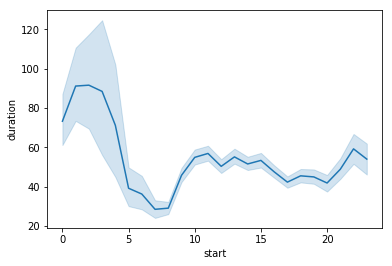

In [8]:
#Lineplot to show the average duration based on the hour of the day
sns.lineplot(data=metro, x='start', y='duration')

The above visualisation depicts the relationship between the duration of the journey and the hour of the day the journey was taken. In the early hours of the morning, we see a longer duration, followed by a dip. After that, the duration seems to average out for the remainder of the day.

## 1.7 Duration/Day of the Week

C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


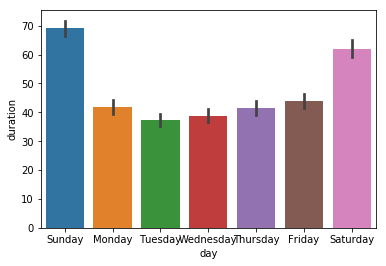

In [9]:
#Create a new column, extracting the day of the week from the timestamp
dayOfWeek = metro.start_time.dt.day_name()
metro['day'] = dayOfWeek

#Create a plot showing how the duration variable varies per given day
sns.barplot(data = metro, x='day', y='duration')

## 1.8 Passholders Travelling Per Day

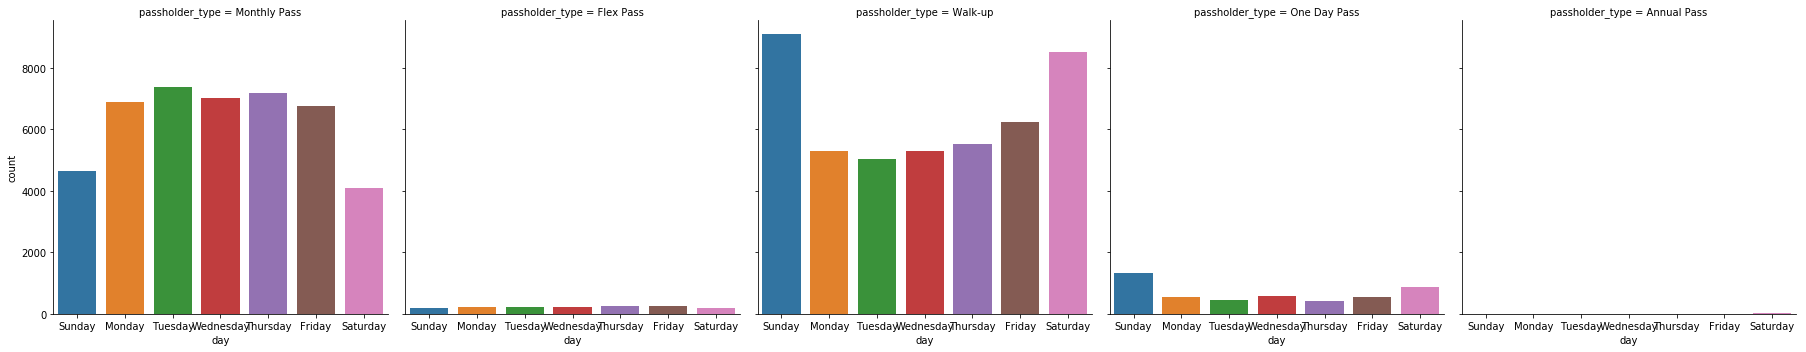

In [10]:
sns.catplot("day", col="passholder_type", data=metro, kind="count")

The above graph shows that there are very little annual pass holders. Namely, there are only 12 annual passholders.

## 1.9 Network Visualisation

A network of data is made up of the initial nodes and the edges between them. For this network, the start and stop station will be used as the nodes. Each node **must** have an edge within the network, since each and every journey has a start and end point. From this, the weight of each edge will be determined by the number of journeys made between each node, namely from point A to point B. Furthermore, an edge will only be made from point A to point B, and not B to A. 

In [11]:
#Used to visualise the network
import networkx as nx

#Create a new graph, with each unique start/end station as nodes
g = nx.Graph()

metro["stations"] = metro.start_station + metro.end_station

uniqueNodes = metro.stations.unique()

for i in range(len(uniqueNodes)):
    g.add_node(uniqueNodes[i])
    
#For each row in the data set, take the start and end station to define each edge
for l in range(len(metro.index)):
    a,b = metro.get_value(l, 'start_station'), metro.get_value(l, 'end_station')
    
    #If the edge already exists, or the reverse of the edge, add one to the weight
    if g.has_edge(a, b):
        g[a][b]['weight'] = g[a][b]['weight'] + 1
    if g.has_edge(b, a):
        g[b][a]['weight'] = g[b][a]['weight'] + 1
        
    #Otherwise, add the edge to the network
    else:
        g.add_edge(a, b, weight=1)
        
G = nx.complete_graph(g)

C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


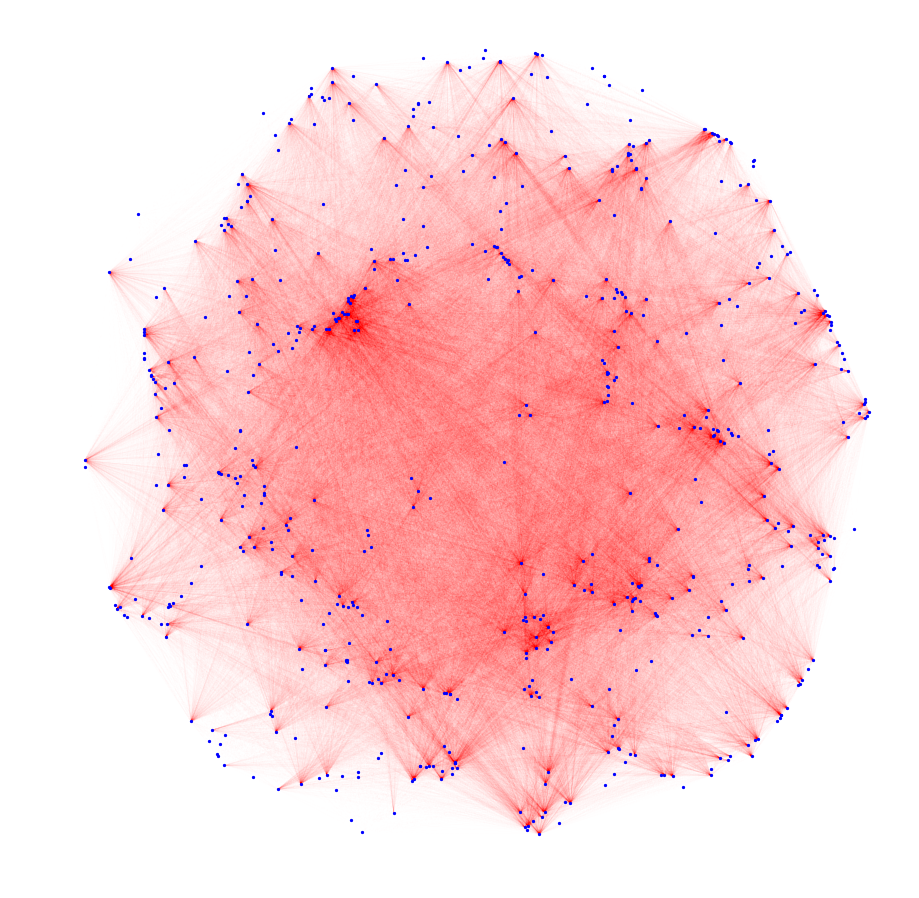

In [12]:
#Plot the network
plt.figure(1, figsize=(12,12))
layout = nx.spring_layout(G)
nx.draw(G, node_size = 5, pos=layout, width = 0.001, node_color='blue', edge_color='red')
plt.show()

Whilst visualising a network this large can be extremely challenging, we are still able to derive meaning from the above visualisation. From where the areas are most dark, we can tell that there are a larger number of journeys happening between them, since the weight of the line is determined by the number of journeys from node A to node B. 

Going on from the logic above, we can therefore derive that the majority of people making use of the metro bike system are taking short-medium length journeys, with longer journeys being further and fewer between. This is clearly shown by the dark patches found in clustered areas of nodes, and ties in with the analysis made earlier

## 1.9.1 Network Statistics

In [13]:
#Clustering coefficient
#cc = nx.clustering(g)
#plt.hist(cc.values(), bins=10)

#Proving G is a complete graph
#nx.density(G)

#nx.degree_assortativity_coefficient(g) 

# Task 2 - Seed Shape Data

In [14]:
#Import scikit-learn library
from sklearn.mixture import GaussianMixture as gm

#Read in the data file into a panda dataframe
seeds = pd.read_csv("seeds.csv")
seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groove length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


## 2.1 Gaussian Mixture Model

In [15]:
mixturemodel = gm(n_components=2).fit(seeds)

## 2.2 Groove Length/Compactness Clustering

Text(0,0.5,'Groove Length')

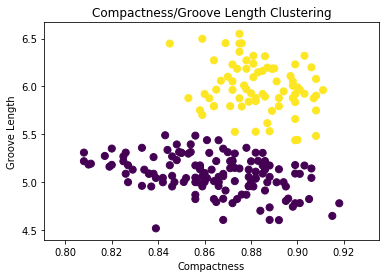

In [35]:
mixmodel = gm(n_components = 2, init_params='kmeans')
mixmodel.fit(seeds[['compactness','groove length']])
clust_labels = mixmodel.predict(seeds[['compactness','groove length']])

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(seeds['compactness'], seeds['groove length'], c=clust_labels, s=50)
ax.set_title('Compactness/Groove Length Clustering')
ax.set_xlabel('Compactness')
ax.set_ylabel('Groove Length')

## 2.3 Model Fitting

When determining the number of components to use for Gaussian mixture clustering, two examples of models which can determine the number of components that should be used are the Akaike information criterion (hereafter referred to as AIC) and the Bayesian information criterion (hereafter referred to as BIC). These models are used to determine the quality of statisticals models given a set of data, wherein it compares the quality of each model to the other models. It performs this function using ideal candidates, with the BIC having a stricter penalty when selecting ideal candidates. As such, this is can lead to BIC potentially overfitting, but with AIC causing information to be lost. 

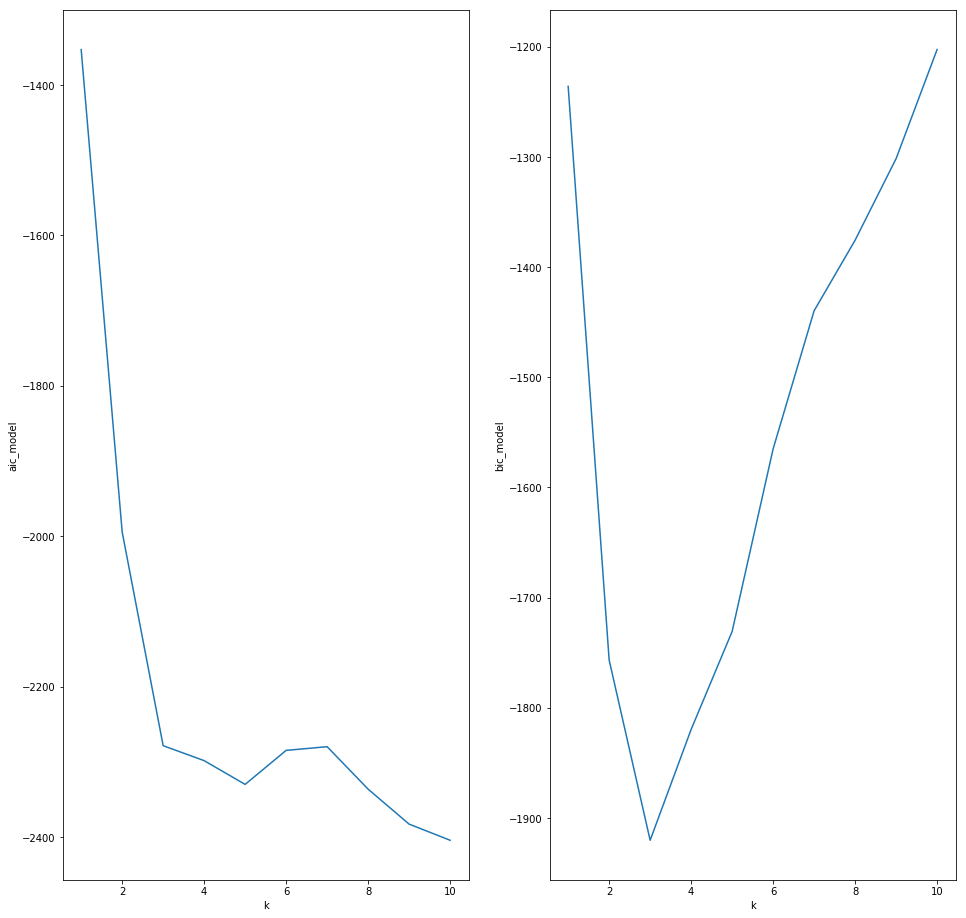

In [50]:
#Checking to see best number of clusters
model_aic = pd.DataFrame(columns=['aic_model', 'k'])
model_bic = pd.DataFrame(columns=['bic_model', 'k'])

for i in range(1,11):
    mixmodel = gm(n_components=i)
    mixmodel.fit(seeds)
    model_aic.loc[i] = [mixmodel.aic(seeds), i]
    model_bic.loc[i] = [mixmodel.bic(seeds), i]


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,16))
sns.lineplot(x='k', y='aic_model', data=model_aic, ax=ax1)
sns.lineplot(x='k', y='bic_model', data=model_bic, ax=ax2)
plt.show()

Based on the results shown above, using both the AIC and BIC model, it is possible to draw some conclusions. Firstly, the AIC model is not well suited for purpose in this case. This is due to the fact by using the AIC model, we are given different answers as to the appropriate number of clusters each time the function is run, whereas the BIC model always select 3 components as the appropriate answer. 

This is likely due to the fact that the BIC model uses a harsher pentalty for the number of accepted parameters, hence less variation in the answer. As such, the appropriate answer for the number of components can be deemed as 3 components for clustering. 